In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

#### 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

    Machine Learning is a process where computer system is able to learn and adapt without explicit instructions. But for machine to do so the input data should have some recognizable patterns. Hence first and foremost the raw data set we collect should have features that can be processed to have discernable patterns for the machine to understand. 
    
    Now assuming we do have such a data that we can process and is fit as input for ML, should we proceed with ML. Many data set would meet the above matter, so should we put all the data through ML. If so, to what end?
    
    Any kind of processing, even in ML utilizes resources like compute power and storage space. These are highly expensive resources, not accounting for the human resources required to get the data ready for ML which 80% of the work. Hence, we need to have the objective of using ML very clear.
    
    We should have a clear and specific understanding of what we hope to achieve out of a ML project. This not only help in optimum resource utilization but also ensure we get better results


#### 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 

In [2]:
# Loading data into df
lending_data_df = pd.read_csv("loans_full_schema.csv")

# Checking shape
display(lending_data_df.shape)

# Checking top columns with null values
nullseries = lending_data_df.isnull().sum().sort_values(ascending=False)
print("**Columns with null values: **\n",nullseries[nullseries>0])

# Checking for column unique values to identify columns for encoding
unique_val = lending_data_df.nunique().sort_values()
print("**Unique Values for all columns: **\n",unique_val[unique_val<5])

(10000, 55)

**Columns with null values: **
 verification_income_joint           8545
debt_to_income_joint                8505
annual_income_joint                 8505
months_since_90d_late               7715
months_since_last_delinq            5658
months_since_last_credit_inquiry    1271
emp_title                            833
emp_length                           817
num_accounts_120d_past_due           318
debt_to_income                        24
dtype: int64
**Unique Values for all columns: **
 num_accounts_120d_past_due    1
num_accounts_30d_past_due     2
current_accounts_delinq       2
term                          2
application_type              2
disbursement_method           2
initial_listing_status        2
verified_income               3
issue_month                   3
verification_income_joint     3
homeownership                 3
public_record_bankrupt        4
num_collections_last_12m      4
dtype: int64


#####  Step 1: Handling NaNs
    Removed rows where emp_title are NaNs
    For integer columns repalcinf NaNs with 0 and handing String columns as per case

In [3]:
# Dropping rows where emp_title is NaN
lending_data_df.dropna(axis=0, subset=['emp_title'], inplace=True)
lending_data_df.shape

(9167, 55)

In [4]:
# Filling int col NaN values with 0
lending_data_df['debt_to_income_joint'] = lending_data_df['debt_to_income_joint'].fillna(0)
lending_data_df['annual_income_joint'] = lending_data_df['annual_income_joint'].fillna(0)
lending_data_df['months_since_90d_late'] = lending_data_df['months_since_90d_late'].fillna(0)
lending_data_df['months_since_last_delinq'] = lending_data_df['months_since_last_delinq'].fillna(0)
lending_data_df['months_since_last_credit_inquiry'] = lending_data_df['months_since_last_credit_inquiry'].fillna(0)
lending_data_df['debt_to_income'] = lending_data_df['debt_to_income'].fillna(0)

# For verification_income_joint replacing NaN's with "Not Applicable" as those are related to Individual Application types
lending_data_df['verification_income_joint'] = lending_data_df['verification_income_joint'].fillna('Not Applicable')

#####  Step 2: Identifying Categorical Data
    Dropping columns which do not contribute to the whole data set
    Identifying Categorical values and converting them into numerical as per distribution 

In [5]:
# Checking value counts for columns identified as categorical data
display(lending_data_df[['num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'current_accounts_delinq','term']].value_counts())
display(lending_data_df['application_type'].value_counts())
display(lending_data_df['disbursement_method'].value_counts())
display(lending_data_df['initial_listing_status'].value_counts())
display(lending_data_df['verified_income'].value_counts())
display(lending_data_df['verification_income_joint'].value_counts())
display(lending_data_df['homeownership'].value_counts())
display(lending_data_df['public_record_bankrupt'].value_counts())
display(lending_data_df['num_collections_last_12m'].value_counts())

num_accounts_120d_past_due  num_accounts_30d_past_due  current_accounts_delinq  term
0.0                         0                          0                        36      6160
                                                                                60      2712
dtype: int64

individual    7875
joint         1292
Name: application_type, dtype: int64

Cash         8499
DirectPay     668
Name: disbursement_method, dtype: int64

whole         7545
fractional    1622
Name: initial_listing_status, dtype: int64

Source Verified    3934
Not Verified       3267
Verified           1966
Name: verified_income, dtype: int64

Not Applicable     7909
Not Verified        531
Source Verified     458
Verified            269
Name: verification_income_joint, dtype: int64

MORTGAGE    4459
RENT        3583
OWN         1125
Name: homeownership, dtype: int64

0    8105
1    1047
2      13
3       2
Name: public_record_bankrupt, dtype: int64

0    9052
1     106
2       8
3       1
Name: num_collections_last_12m, dtype: int64

In [6]:
# Dropping three columns identified above as not contrbuting much to dataset

lending_data_df.drop(['num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'current_accounts_delinq'], axis=1,inplace=True)

lending_data_df.shape

(9167, 52)

In [7]:
# Changing Categorical column values to numerical values

# application_type
app_c, app_v = pd.factorize(lending_data_df['application_type'])
lending_data_df['application_type'] = app_c

# disbursement_method           
disb_c, disb_v = pd.factorize(lending_data_df['disbursement_method'])
lending_data_df['disbursement_method'] = disb_c

# initial_listing_status        
ils_c, ils_v = pd.factorize(lending_data_df['initial_listing_status'])
lending_data_df['initial_listing_status'] = ils_c

# verified_income               
vi_c, vi_v = pd.factorize(lending_data_df['verified_income'])
lending_data_df['verified_income'] = vi_c

# verification_income_joint     
vij_c, vij_v = pd.factorize(lending_data_df['verification_income_joint'])
lending_data_df['verification_income_joint'] = vij_c

# homeownership  
ho_c, ho_v = pd.factorize(lending_data_df['homeownership'])
lending_data_df['homeownership'] = ho_c


In [8]:
lending_data_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,0,90000.0,0,18.01,0.0,0,0.00,...,C3,Mar-2018,Current,0,0,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,1,40000.0,1,5.04,0.0,0,0.00,...,C1,Feb-2018,Current,0,0,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,1,40000.0,2,21.15,0.0,0,0.00,...,D1,Feb-2018,Current,1,0,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,1,30000.0,1,10.16,0.0,0,0.00,...,A3,Jan-2018,Current,0,0,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,1,35000.0,0,57.96,57000.0,1,37.66,...,C3,Mar-2018,Current,0,0,21430.15,2324.65,1569.85,754.80,0.0


#####  Step 3 Stratified Sampling    
    Splitting data into train and test set according to application_type

In [9]:
from sklearn.model_selection import train_test_split

loans_X = lending_data_df.drop("application_type",axis=1)
loans_y = lending_data_df[["application_type"]]


X_train, X_test, y_train, y_test = train_test_split(loans_X, loans_y, stratify=loans_y)

print(y_train["application_type"].value_counts())

0    5906
1     969
Name: application_type, dtype: int64


#### 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

To better visualise the heatmap, taking only subet data from dataframe of loan amount and it's features exclusing any data related to the individual or the join applicant

In [10]:
lending_data_df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate

In [11]:
loan_df = lending_data_df[['loan_amount', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'issue_month',
       'loan_status', 'initial_listing_status', 'disbursement_method',
       'balance', 'paid_total', 'paid_principal', 'paid_interest',
       'paid_late_fees']]
loan_df.head()

,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,28000,60,14.07,652.53,C,C3,Mar-2018,Current,0,0,27015.86,1999.33,984.14,1015.19,0.0
1,5000,36,12.61,167.54,C,C1,Feb-2018,Current,0,0,4651.37,499.12,348.63,150.49,0.0
2,2000,36,17.09,71.40,D,D1,Feb-2018,Current,1,0,1824.63,281.80,175.37,106.43,0.0
3,21600,36,6.72,664.19,A,A3,Jan-2018,Current,0,0,18853.26,3312.89,2746.74,566.15,0.0
4,23000,36,14.07,786.87,C,C3,Mar-2018,Current,0,0,21430.15,2324.65,1569.85,754.80,0.0


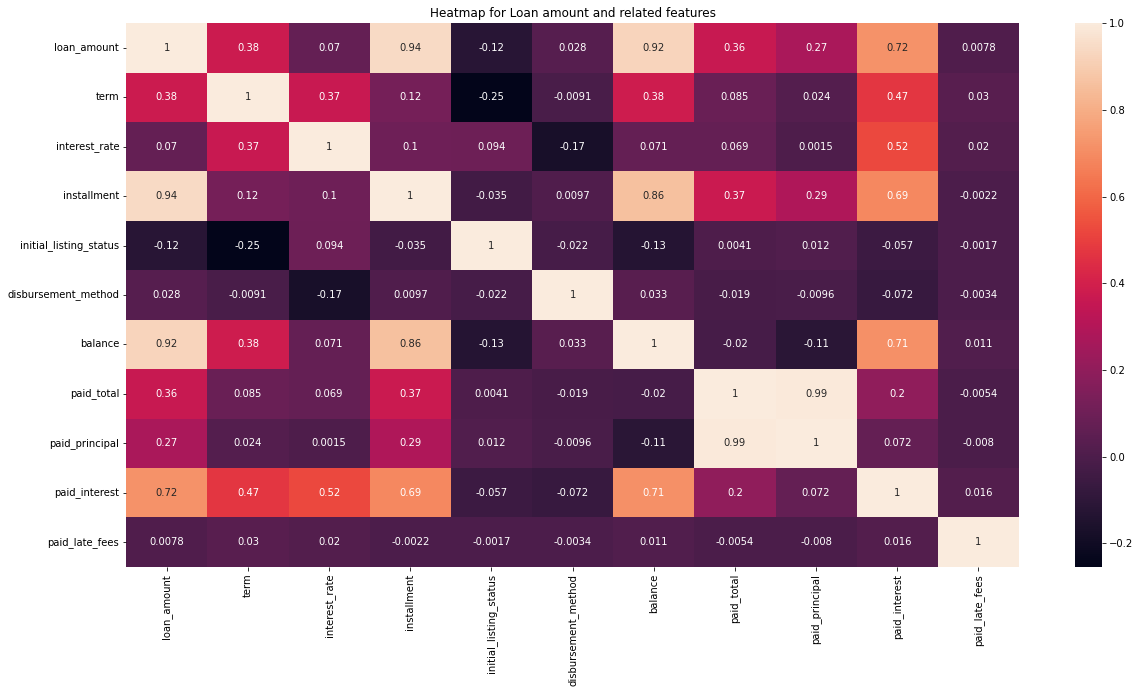

In [12]:
loan_corr = loan_df.corr()
loan_corr
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(loan_corr, annot=True)
plt.title("Heatmap for Loan amount and related features")
plt.show()

##### Observations:
    1. Almost all of the features is positively correlated with each other.
    2. paid_interest has strong correlation with loan_amount, term, interest_rate and installment
    3. paid_total has a strong correlationd with paid_principal
    4. disbursment method has no relation with the loan amount and it's features
    5. balance is strongly related to paid_interest, installment and loan_amount
    6, paid_total and paid pricipal has a very strong coeff
    

#### 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

Min loan amount: 1000
Max loan amount: 40000
Most loan amounts:


<AxesSubplot:title={'center':'Loan Amount distribution'}>

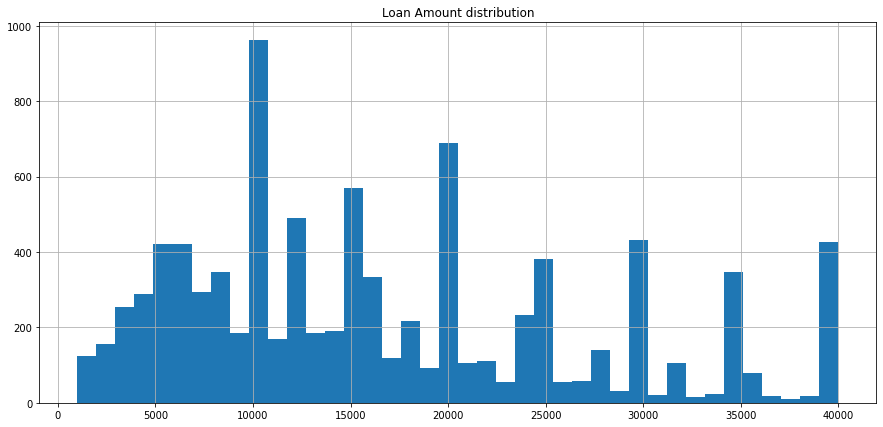

In [13]:
print("Min loan amount:",lending_data_df['loan_amount'].min())
print("Max loan amount:",lending_data_df['loan_amount'].max())
print("Most loan amounts:")

plt.subplots(1,1,figsize=(15,7))
plt.title("Loan Amount distribution")
lending_data_df['loan_amount'].hist(bins = 40)

As per the min and maximun loan amount selected bin size of 40.

##### Observations:
    - 10,000 is by far the most common loan amount followed by 20,000.
    - There is significant loan amounts observed between 5000 and 10000.
    - Between 20000 and 40000 we see majority loan amounts for round up figures like 20K, 25K and so on but only few in betwen. 

#### 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
    a.	Is there a better way to do this than with a lambda? 
    b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

In [14]:
lending_data_df['state'].unique()

array(['NJ', 'HI', 'WI', 'PA', 'CA', 'MI', 'AZ', 'NV', 'IL', 'FL', 'SC',
       'CO', 'TN', 'KY', 'VA', 'NY', 'GA', 'MO', 'TX', 'AR', 'MD', 'NC',
       'NE', 'WV', 'NH', 'UT', 'MA', 'OH', 'OK', 'SD', 'MN', 'AL', 'LA',
       'IN', 'KS', 'MS', 'OR', 'WA', 'ME', 'VT', 'CT', 'NM', 'AK', 'DE',
       'MT', 'RI', 'ND', 'DC', 'ID', 'WY'], dtype=object)

##### Creating 'Region' column with the use of lambda

In [15]:
#starting timer
start = time.time()

# lambda approach
northeast = ['ME', 'MA', 'RI', 'CT', 'NH', 'VT', 'NY', 'PA', 'NJ', 'DE', 'MD','DC'] 
south = ['WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'AL', 'MS', 'AK', 'LA', 'FL','TX', 'OK', 'NM', 'AZ', 'AR']
midwest = ['OH', 'IN', 'MI', 'IL', 'WI', 'MN', 'SD', 'ND']
pacific = ['CO', 'WY', 'MT', 'ID', 'WA', 'OR', 'UT', 'CA', 'AL', 'HI','NV']
plains = ['IA','MO','NE','KS']
    
def region(row):
    if row['state'] in northeast:
        return 'Northeast'
    if row['state'] in south:
        return 'South'   
    if row['state'] in midwest:
        return 'Midwest'
    if row['state'] in pacific:
        return 'Pacific'
    if row['state'] in plains:
        return 'Plains'
    
lending_data_df['Region'] = lending_data_df.apply(lambda row: region(row), axis =1)

end = time.time()

print("Time taken to process lambda function approach",end-start)

Time taken to process lambda function approach 0.27323222160339355


##### Alternating approach then using lambda is to use np.select

In [16]:
# starting timer
start = time.time()

# np.select approach
conditions = [lending_data_df['state'].isin(northeast),
             lending_data_df['state'].isin(south),
             lending_data_df['state'].isin(midwest),
             lending_data_df['state'].isin(pacific),
             lending_data_df['state'].isin(plains)]

output = ['Northeast','South','Midwest','Pacific','Plains']

lending_data_df['Region_1'] = np.select(conditions,output)

end = time.time()

print("Time taken to process np.select approach",end-start)

Time taken to process np.select approach 0.011969327926635742


In [17]:
lending_data_df['Region'].equals(lending_data_df['Region_1'])

True

As we can see from the time raken to process both the cases that np.select takes much less time than lambda function to create Region column with approproate values

In [18]:
# Removing duplicate columns
lending_data_df.drop('Region_1',axis=1,inplace=True)
lending_data_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Region
0,global config engineer,3.0,NJ,0,90000.0,0,18.01,0.0,0,0.00,...,Mar-2018,Current,0,0,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.0,HI,1,40000.0,1,5.04,0.0,0,0.00,...,Feb-2018,Current,0,0,4651.37,499.12,348.63,150.49,0.0,Pacific
2,assembly,3.0,WI,1,40000.0,2,21.15,0.0,0,0.00,...,Feb-2018,Current,1,0,1824.63,281.80,175.37,106.43,0.0,Midwest
3,customer service,1.0,PA,1,30000.0,1,10.16,0.0,0,0.00,...,Jan-2018,Current,0,0,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,security supervisor,10.0,CA,1,35000.0,0,57.96,57000.0,1,37.66,...,Mar-2018,Current,0,0,21430.15,2324.65,1569.85,754.80,0.0,Pacific


#### 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [19]:
loans_region_df = lending_data_df.groupby('Region')['loan_amount'].value_counts()

In [20]:
loans_region_df = pd.DataFrame(loans_region_df)
loans_region_df.columns = ["No. of loans"]
loans_region_df.reset_index(inplace=True)

loans_region_df

,Region,loan_amount,No. of loans
0,Midwest,10000,119
1,Midwest,20000,84
2,Midwest,15000,80
3,Midwest,40000,68
4,Midwest,12000,60
...,...,...,...
1055,South,39000,1
1056,South,39275,1
1057,South,39400,1
1058,South,39425,1


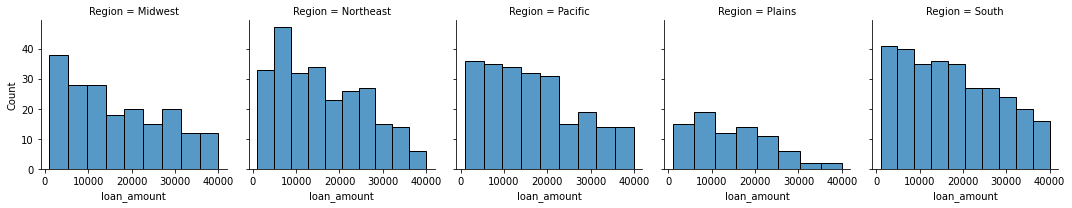

In [22]:
g = sns.FacetGrid(loans_region_df, col='Region')

g.map(sns.histplot, 'loan_amount')

plt.show()

##### Observations:
    - South see the highest total Loans. Plains have the lowest loans. However the area covered by each region makes these observations counter intuitive.
    - In Pacific region majority of loans are below 25K
    - Northeast region sees a distributed amounts of loan across the spectrum.
    - Midwest has hower frequency of loans in comparision to other regions (excluding Plains which covers only 4 states).

### DataCamp's Machine Learning for Business

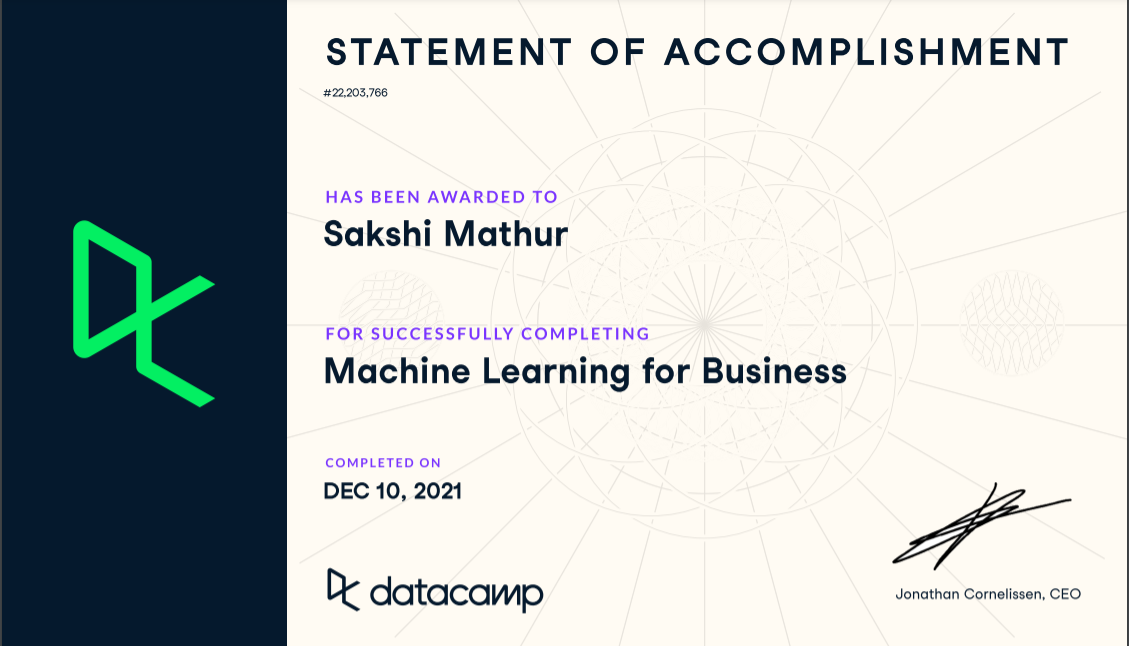

### DataCamp's Python Data Science Toolbox (Part 1)

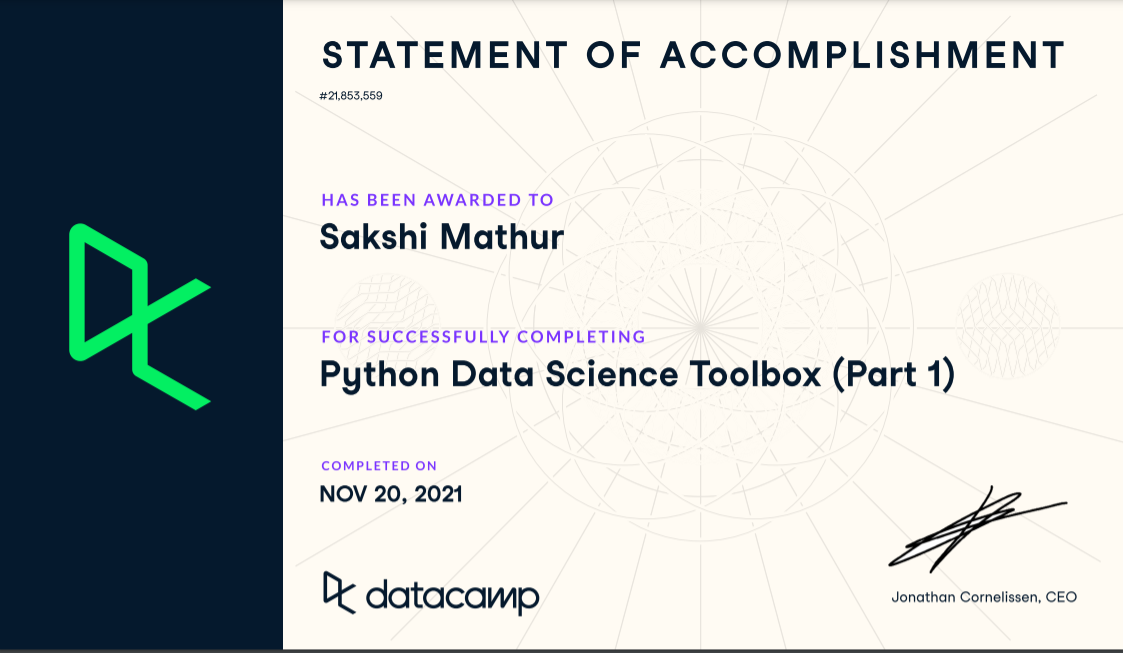